# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In this project, we will build a portfolio of Tesla, Meta, Google, Microsoft, Toyota Motors, and General motors stocks. The aim of this study is to build a high risk and a low risk portfolio given a few constraints.

In [2]:
#load data for Ford (F) and General Motors (GM) stock
tickers = ['TSLA', 'META', 'GOOG', 'MSFT', 'TM', 'GM']

start_date = dt.datetime.today()-dt.timedelta(days = 365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [3]:
stock.tail()

Price           Close                                                  \
Ticker             GM        GOOG        META        MSFT          TM   
Date                                                                    
2025-05-19  50.029999  167.869995  640.429993  458.869995  185.320007   
2025-05-20  50.209999  165.320007  637.099976  458.170013  186.360001   
2025-05-21  49.369999  170.059998  635.500000  452.570007  184.470001   
2025-05-22  49.279999  171.979996  636.570007  454.859985  182.820007   
2025-05-23  48.689999  169.589996  627.059998  450.179993  182.300003   

Price                        High                                      ...  \
Ticker            TSLA         GM        GOOG        META        MSFT  ...   
Date                                                                   ...   
2025-05-19  342.089996  50.349998  167.949997  643.000000  459.589996  ...   
2025-05-20  343.820007  50.549999  169.679993  639.349976  458.339996  ...   
2025-05-21  334.619995  50.540001  174.529999  646.609985  457.779999  ...   
2025-05-22  341.040009  49.680000  178.130005  643.250000  460.250000  ...   
2025-05-23  339.339996  49.169998  171.205002  632.445007  453.690002  ...   

Price             Open                                       Volume            \
Ticker            META        MSFT          TM        TSLA       GM      GOOG   
Date                                                                            
2025-05-19  628.250000  450.880005  183.190002  336.299988  9406500  21374700   
2025-05-20  636.010010  455.589996  186.149994  347.869995  6565400  33563300   
2025-05-21  631.789978  454.570007  185.720001  344.429993  7515600  45567600   
2025-05-22  634.049988  454.950012  181.990005  331.899994  6378200  45024100   
2025-05-23  624.080017  449.980011  181.250000  337.920013  5611900  24853092   

Price                                              
Ticker          META      MSFT      TM       TSLA  
Date                                               
2025-05-19   9592400  21336500  289400   88869900  
2025-05-20   6743500  15441800  309900  131715500  
2025-05-21  11464600  19216900  257100  102354800  
2025-05-22   8228400  18025600  378800   97113400  
2025-05-23   8371907  16876000  485200   84439200  

[5 rows x 30 columns]

In [4]:
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()

In [5]:
daily_returns

Ticker,GM,GOOG,META,MSFT,TM,TSLA
Date,,,,,,
2024-05-24,0.008652,0.007229,0.026357,0.007373,0.009825,0.031166
2024-05-28,-0.023395,0.009539,0.003549,0.000372,0.008633,-0.013989
2024-05-29,-0.010498,-0.003489,-0.011653,-0.002676,-0.022050,-0.003173
2024-05-30,0.017897,-0.021884,-0.015530,-0.034370,0.001028,0.014649
2024-05-31,0.035751,0.002302,-0.000471,0.001109,0.015475,-0.003979
...,...,...,...,...,...,...
2025-05-19,-0.006773,0.002625,0.000140,0.010075,0.011560,-0.022802
2025-05-20,0.003591,-0.015307,-0.005213,-0.001527,0.005596,0.005044
2025-05-21,-0.016871,0.028268,-0.002515,-0.012298,-0.010193,-0.027123


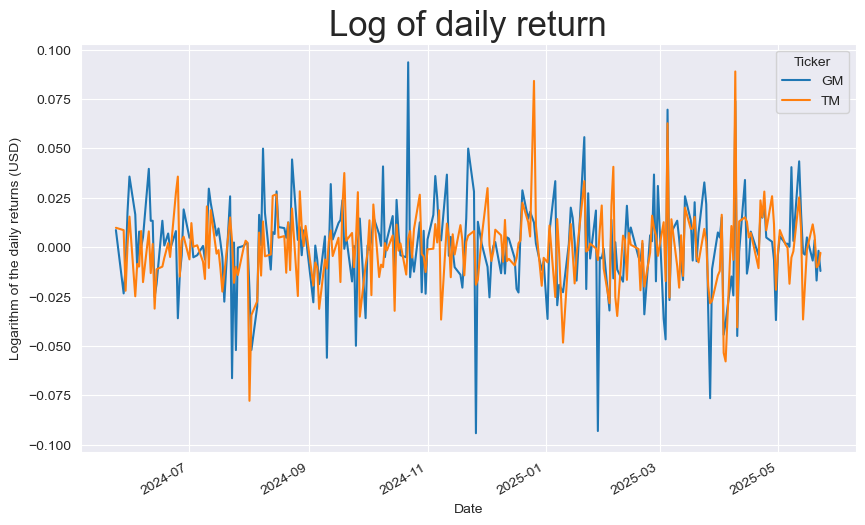

In [6]:
daily_returns.plot(y=['GM', 'TM'], figsize=(10,6), grid=True)
plt.title(f'Log of daily return', size = 25)
plt.ylabel('Logarithm of the daily returns (USD)')
plt.show()

In [7]:
annualized_expectation = {ticker: np.mean(daily_returns[ticker]) for ticker in tickers}
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}

In [8]:
annualized_volatility

{'TSLA': 0.7096315228460032,
 'META': 0.36760220875720523,
 'GOOG': 0.31216607459773166,
 'MSFT': 0.2555067634855621,
 'TM': 0.3011070682193579,
 'GM': 0.37421732895471077}

In [9]:
annualized_expectation

{'TSLA': 0.002677770333496033,
 'META': 0.0012038809797980314,
 'GOOG': -0.00010807895868601339,
 'MSFT': 0.00024200465265344047,
 'TM': -0.0005974075960639852,
 'GM': 0.00046945959595193963}

In [10]:
covariance_matrix = 252*((daily_returns).cov())

In [11]:
covariance_matrix

Ticker,GM,GOOG,META,MSFT,TM,TSLA
Ticker,,,,,,
GM,0.140601,0.032831,0.043283,0.024772,0.049038,0.077495
GOOG,0.032831,0.097839,0.071128,0.048304,0.034589,0.126327
META,0.043283,0.071128,0.135674,0.063080,0.041442,0.138046
MSFT,0.024772,0.048304,0.063080,0.065546,0.026906,0.094557
TM,0.049038,0.034589,0.041442,0.026906,0.091030,0.069832
TSLA,0.077495,0.126327,0.138046,0.094557,0.069832,0.505599


Our two main tools will be to study the expected value and the volatility (a notion proportional to the standard deviation). The idea will be to maximize the expected value for the high risk profile, and to minimize the volatility for the low risk profile. That is, if we are willing to risk more, we are mostly interested in maximizing the return, while if we aim to have a lower risk portfolio, we want to reduce the volatility, so that our portfolio is closer in value to what we expect.

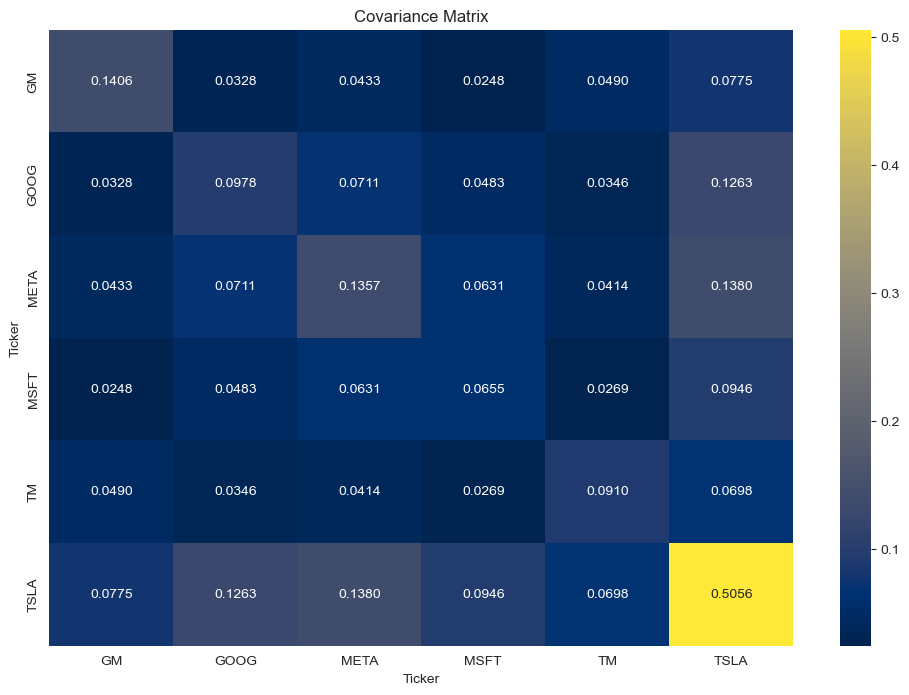

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

In [13]:
n_assets = len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
TSLA: Weight = 0.1638
META: Weight = 0.0922
GOOG: Weight = 0.0926
MSFT: Weight = 0.3280
TM: Weight = 0.2311
GM: Weight = 0.0923


In [14]:
print(f' The optimal volatility subject to the constraints is {result.fun}')

 The optimal volatility subject to the constraints is 0.24802177130146957


In [15]:
n_assets = len(tickers)

initial_weights = np.array([1/n_assets] * n_assets)

expctd = list(annualized_expectation.values())

constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

def portfolio_mean(weights):
    portfolio_mn = - np.dot(weights.T, expctd)
    return portfolio_mn

result = minimize(portfolio_mean, initial_weights, constraints=constraints)

optimal_weights = result.x

print("Optimal Asset Weights to maximize expected return:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to maximize expected return:
TSLA: Weight = 0.3500
META: Weight = 0.2086
GOOG: Weight = 0.1004
MSFT: Weight = 0.1087
TM: Weight = 0.1000
GM: Weight = 0.1323


In [16]:
print(f' The optimal mean subject to the constraints is {-result.fun}')

 The optimal mean subject to the constraints is 0.0012062185451415918
